In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
from os import system

In [4]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev641+master.f0c0668
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2734+master.091d785


In [5]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/04/1520146339.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/03/04/1520146339.h5


In [6]:
d = katdal.open(h5_filename);
ant_list,ants = [],[]
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520142927.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added '0008-421' [radec] (and 1 aliases)
DEBUG: Added '0023-263' [radec] (and 1 aliases)
DEBUG: Added '0252-712' [radec] (and 1 aliases)
DEBUG: Added '1709-281' [radec] (and 1 aliases)
DEBUG: Added '1722-554' [radec] (and 1 aliases)
DEBUG: Added 'NRAO530' [radec] (and 1 aliases)
DEBUG: Added '1740-517' [radec] (and 1 aliases)
DEBUG: Added '1827-360' [radec] (and 1 aliases)
DEBUG: Added '1830-210' [radec] (and 1 aliases)
DEBUG: Added 'OV-236' [radec] (and 1 aliases)
DEBUG: Added '1934-638' [radec] (and 1 aliases)
DEBUG: Added '2128+048' [radec] (and 1 aliases)
DEBUG: Add

In [7]:
ant_list.remove('m063') # not working
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m006,m008,m013,m015,m034,m035,m036,m040,m041,m044,m047,m052,m057,m059,m060
env: ants=m006,m008,m013,m015,m034,m035,m036,m040,m041,m044,m047,m052,m057,m059,m060


In [8]:
ref_ant='m006'
%set_env ref_ant=$ref_ant

env: ref_ant=m006



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520142927.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (15): m006 (*ref*), m008, m013, m015, m034, m035, m036, m040, m041, m044, m047, m052, m057, m059, m060 [pol H]
baselines (105): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 0-9 0-10 0-11 0-12 0-13 0-1

scan  23 (  15 samples) 0.040 0.038 0.040 0.037 0.040 0.038 0.044 0.044 0.042 0.041 0.038 0.041 0.039 0.038 0.042 0.041 0.043 0.042 0.040 0.041 0.039 0.038 0.040 0.039 0.037 0.041 0.039 0.041 0.041 0.044 0.040 0.039 0.042 0.039 0.042 0.040 0.041 0.040 0.038 0.042 0.040 0.041 0.039 0.040 0.042 0.041 0.044 0.042 0.042 0.042 0.041 0.042 0.037 0.040 0.039 0.039 0.038 0.039 0.038 0.039 0.044 0.041 0.042 0.041 0.041 0.041 0.043 0.040 0.038 0.040 0.037 0.039 0.039 0.040 0.037 0.040 0.040 0.039 0.039 0.040 0.041 0.038 0.040 0.038 0.039 0.042 0.039 0.040 0.038 0.039 0.043 0.039 0.043 0.040 0.041 0.039 0.041 0.038 0.039 0.039 0.037 0.038 0.041 0.042 0.039 '2128+048'
scan  24 (   3 samples) skipped 'slew'
scan  25 (  15 samples) 0.047 0.046 0.050 0.044 0.047 0.047 0.050 0.053 0.049 0.047 0.047 0.049 0.047 0.046 0.050 0.048 0.052 0.048 0.046 0.052 0.050 0.047 0.048 0.047 0.044 0.049 0.046 0.047 0.046 0.050 0.048 0.046 0.050 0.047 0.049 0.046 0.050 0.047 0.046 0.050 0.047 0.049 0.046 0.048 0.050 0.

scan  47 (  15 samples) 0.036 0.034 0.036 0.034 0.034 0.031 0.034 0.038 0.037 0.035 0.036 0.034 0.033 0.038 0.037 0.035 0.035 0.034 0.033 0.038 0.036 0.032 0.036 0.035 0.033 0.035 0.034 0.036 0.034 0.036 0.033 0.033 0.036 0.032 0.036 0.034 0.035 0.034 0.033 0.036 0.034 0.035 0.033 0.035 0.035 0.034 0.038 0.035 0.036 0.034 0.036 0.035 0.032 0.035 0.032 0.033 0.033 0.034 0.033 0.034 0.036 0.034 0.035 0.034 0.034 0.035 0.036 0.034 0.033 0.034 0.032 0.033 0.033 0.034 0.032 0.033 0.034 0.033 0.034 0.034 0.035 0.032 0.034 0.033 0.034 0.036 0.033 0.034 0.032 0.033 0.037 0.033 0.036 0.034 0.034 0.032 0.034 0.033 0.033 0.033 0.031 0.032 0.035 0.036 0.034 '1722-554'
scan  48 (  20 samples) skipped 'slew'
scan  49 (  15 samples) 0.025 0.025 0.027 0.030 0.025 0.024 0.026 0.027 0.026 0.027 0.025 0.026 0.025 0.032 0.026 0.027 0.027 0.027 0.025 0.026 0.025 0.024 0.025 0.024 0.024 0.026 0.024 0.025 0.025 0.026 0.025 0.025 0.027 0.025 0.026 0.026 0.026 0.025 0.024 0.027 0.025 0.026 0.024 0.025 0.026 0.

scan  71 (  16 samples) 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.013 0.012 0.011 0.013 0.013 0.012 0.013 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.013 0.012 0.012 0.012 0.013 0.012 0.011 0.013 0.012 0.012 0.012 0.012 0.013 0.012 0.013 0.012 0.013 0.012 0.013 0.013 0.011 0.012 0.012 0.012 0.011 0.011 0.012 0.012 0.013 0.012 0.013 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.011 0.012 0.013 0.012 0.012 0.011 0.012 0.013 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.011 0.012 0.013 0.012 '0408-658'
scan  72 (   9 samples) skipped 'slew'
scan  73 (  15 samples) 0.023 0.023 0.024 0.021 0.023 0.023 0.024 0.025 0.024 0.023 0.023 0.024 0.023 0.022 0.025 0.024 0.025 0.023 0.023 0.025 0.024 0.023 0.024 0.022 0.022 0.024 0.022 0.023 0.023 0.024 0.023 0.022 0.024 0.023 0.024 0.023 0.024 0.023 0.022 0.025 0.023 0.024 0.022 0.023 0.024 0.

scan  95 (  16 samples) 0.026 0.025 0.027 0.027 0.026 0.025 0.027 0.028 0.027 0.026 0.025 0.027 0.025 0.027 0.027 0.027 0.028 0.028 0.026 0.028 0.026 0.024 0.026 0.025 0.025 0.027 0.025 0.026 0.025 0.029 0.026 0.025 0.027 0.026 0.027 0.025 0.027 0.026 0.025 0.027 0.026 0.027 0.025 0.026 0.027 0.026 0.029 0.027 0.028 0.026 0.027 0.026 0.025 0.027 0.026 0.027 0.025 0.025 0.026 0.026 0.030 0.028 0.030 0.028 0.029 0.029 0.030 0.028 0.027 0.029 0.027 0.027 0.028 0.028 0.026 0.026 0.028 0.027 0.028 0.028 0.029 0.027 0.027 0.026 0.025 0.026 0.025 0.028 0.027 0.027 0.028 0.026 0.029 0.028 0.029 0.026 0.028 0.027 0.027 0.028 0.027 0.026 0.029 0.028 0.026 'NRAO530'
scan  96 (  13 samples) skipped 'slew'
scan  97 (  16 samples) 0.029 0.029 0.030 0.027 0.029 0.028 0.030 0.032 0.031 0.029 0.028 0.030 0.028 0.028 0.031 0.029 0.030 0.029 0.029 0.032 0.029 0.028 0.030 0.028 0.028 0.030 0.028 0.029 0.029 0.029 0.029 0.028 0.031 0.029 0.030 0.028 0.030 0.029 0.028 0.030 0.029 0.030 0.028 0.030 0.030 0.0

scan 119 (  15 samples) 0.012 0.011 0.012 0.011 0.011 0.011 0.012 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.012 0.011 0.012 0.011 0.011 0.011 0.011 0.010 0.012 0.011 0.011 0.011 0.012 0.011 0.011 0.012 0.012 0.012 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.011 0.013 0.012 0.012 0.011 0.012 0.012 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.011 0.012 0.011 0.011 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.013 0.011 0.011 0.012 0.011 0.011 0.011 0.012 0.012 0.011 0.012 0.012 0.013 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.012 0.013 0.012 '3C454.3'
scan 120 (   8 samples) skipped 'slew'
scan 121 (  15 samples) 0.084 0.096 0.088 0.091 0.101 0.076 0.097 0.124 0.091 0.090 0.087 0.103 0.085 0.082 0.087 0.105 0.096 0.088 0.094 0.087 0.080 0.081 0.073 0.104 0.083 0.096 0.117 0.114 0.100 0.090 0.098 0.107 0.124 0.110 0.099 0.081 0.093 0.100 0.094 0.098 0.097 0.096 0.095 0.093 0.106 0.1

scan 143 (  15 samples) 0.027 0.025 0.026 0.024 0.026 0.025 0.026 0.027 0.027 0.027 0.025 0.027 0.026 0.024 0.028 0.026 0.028 0.029 0.025 0.028 0.026 0.025 0.026 0.026 0.025 0.026 0.025 0.026 0.025 0.028 0.026 0.025 0.027 0.026 0.027 0.025 0.026 0.026 0.025 0.027 0.026 0.027 0.026 0.026 0.027 0.026 0.028 0.027 0.028 0.026 0.027 0.027 0.024 0.026 0.025 0.026 0.024 0.025 0.025 0.026 0.027 0.026 0.027 0.026 0.026 0.026 0.027 0.025 0.025 0.026 0.024 0.025 0.025 0.026 0.024 0.026 0.026 0.025 0.025 0.026 0.027 0.024 0.026 0.025 0.026 0.026 0.024 0.026 0.025 0.025 0.028 0.025 0.027 0.026 0.027 0.025 0.026 0.025 0.025 0.025 0.024 0.024 0.026 0.027 0.025 '1740-517'
scan 144 (   3 samples) skipped 'slew'
scan 145 (  16 samples) 0.024 0.023 0.025 0.023 0.024 0.023 0.025 0.026 0.025 0.024 0.023 0.025 0.024 0.023 0.025 0.024 0.025 0.025 0.024 0.026 0.025 0.023 0.024 0.023 0.023 0.024 0.023 0.024 0.024 0.025 0.024 0.023 0.025 0.024 0.024 0.024 0.025 0.024 0.023 0.025 0.024 0.025 0.024 0.024 0.024 0.

scan 167 (  15 samples) 0.055 0.055 0.058 0.051 0.053 0.053 0.055 0.060 0.057 0.054 0.052 0.056 0.055 0.051 0.058 0.056 0.059 0.056 0.054 0.060 0.054 0.052 0.056 0.052 0.051 0.055 0.051 0.054 0.054 0.056 0.054 0.052 0.058 0.054 0.056 0.055 0.056 0.054 0.054 0.058 0.055 0.058 0.054 0.055 0.056 0.055 0.060 0.057 0.059 0.057 0.055 0.057 0.050 0.056 0.053 0.055 0.051 0.053 0.052 0.053 0.059 0.055 0.057 0.055 0.057 0.057 0.060 0.055 0.056 0.058 0.055 0.057 0.057 0.058 0.054 0.056 0.059 0.056 0.058 0.058 0.061 0.055 0.057 0.052 0.053 0.057 0.051 0.055 0.056 0.056 0.059 0.054 0.058 0.058 0.059 0.053 0.055 0.055 0.057 0.053 0.053 0.055 0.059 0.059 0.057 '2326-477'
scan 168 (   4 samples) skipped 'slew'
scan 169 (  15 samples) 0.037 0.034 0.037 0.034 0.036 0.034 0.037 0.040 0.038 0.035 0.036 0.037 0.036 0.033 0.037 0.035 0.038 0.035 0.035 0.039 0.036 0.035 0.037 0.035 0.033 0.036 0.034 0.036 0.035 0.037 0.035 0.034 0.037 0.036 0.036 0.035 0.037 0.035 0.034 0.037 0.036 0.037 0.035 0.036 0.037 0.

scan 191 (  15 samples) 0.012 0.011 0.012 0.011 0.011 0.011 0.012 0.012 0.012 0.011 0.011 0.012 0.011 0.010 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.012 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.010 0.011 0.012 0.011 '1934-638'
scan 192 (   7 samples) skipped 'slew'
scan 193 (  16 samples) 0.044 0.041 0.045 0.041 0.043 0.041 0.044 0.046 0.044 0.043 0.042 0.044 0.042 0.041 0.044 0.043 0.046 0.043 0.041 0.046 0.044 0.042 0.044 0.042 0.041 0.044 0.042 0.043 0.042 0.043 0.043 0.042 0.045 0.042 0.044 0.042 0.045 0.043 0.042 0.046 0.043 0.044 0.043 0.044 0.045 0.

scan 215 (  34 samples) 0.039 0.037 0.039 0.036 0.038 0.035 0.038 0.041 0.039 0.038 0.037 0.040 0.038 0.035 0.038 0.040 0.041 0.039 0.037 0.041 0.039 0.037 0.039 0.037 0.035 0.038 0.036 0.038 0.037 0.040 0.037 0.036 0.040 0.038 0.040 0.036 0.039 0.039 0.037 0.040 0.039 0.038 0.036 0.038 0.039 0.037 0.041 0.039 0.042 0.040 0.039 0.039 0.035 0.037 0.036 0.038 0.035 0.036 0.036 0.038 0.038 0.036 0.038 0.035 0.038 0.037 0.038 0.035 0.034 0.036 0.034 0.034 0.035 0.036 0.033 0.038 0.535 0.535 0.536 0.532 0.538 0.534 0.534 0.536 0.036 0.039 0.036 0.036 0.034 0.536 0.042 0.038 0.038 0.036 0.535 0.037 0.037 0.034 0.535 0.036 0.033 0.533 0.036 0.538 0.536 '0008-421'
scan 216 (  15 samples) skipped 'slew'
scan 217 (  16 samples) 0.019 0.019 0.020 0.018 0.019 0.019 0.020 0.021 0.019 0.020 0.019 0.020 0.020 0.018 0.020 0.020 0.021 0.020 0.019 0.021 0.020 0.019 0.020 0.019 0.018 0.019 0.019 0.020 0.019 0.020 0.019 0.018 0.020 0.019 0.020 0.019 0.021 0.019 0.019 0.020 0.019 0.020 0.019 0.019 0.020 0.

scan 239 (  16 samples) 0.044 0.043 0.046 0.043 0.044 0.042 0.044 0.047 0.046 0.043 0.041 0.045 0.043 0.043 0.045 0.043 0.046 0.045 0.043 0.047 0.045 0.043 0.044 0.043 0.041 0.045 0.042 0.044 0.043 0.044 0.043 0.042 0.045 0.044 0.046 0.043 0.045 0.043 0.043 0.046 0.043 0.044 0.043 0.044 0.045 0.043 0.046 0.045 0.046 0.043 0.045 0.046 0.040 0.043 0.042 0.043 0.041 0.041 0.042 0.043 0.046 0.044 0.046 0.044 0.044 0.045 0.046 0.043 0.042 0.043 0.041 0.042 0.041 0.044 0.040 0.042 0.045 0.042 0.043 0.043 0.044 0.041 0.043 0.041 0.042 0.046 0.041 0.044 0.041 0.043 0.047 0.043 0.046 0.044 0.045 0.042 0.043 0.041 0.043 0.043 0.041 0.041 0.044 0.045 0.043 '2128+048'
scan 240 (   2 samples) skipped 'slew'
scan 241 (  15 samples) 0.054 0.050 0.053 0.048 0.051 0.047 0.053 0.054 0.054 0.051 0.051 0.054 0.051 0.049 0.054 0.052 0.056 0.053 0.051 0.054 0.051 0.049 0.050 0.049 0.047 0.052 0.050 0.052 0.050 0.054 0.051 0.049 0.053 0.051 0.053 0.050 0.053 0.052 0.049 0.053 0.051 0.053 0.050 0.051 0.053 0.

scan 263 (  15 samples) 0.027 0.025 0.027 0.024 0.026 0.025 0.026 0.028 0.027 0.026 0.025 0.027 0.025 0.025 0.026 0.026 0.028 0.027 0.025 0.028 0.026 0.025 0.027 0.025 0.024 0.027 0.025 0.027 0.026 0.026 0.026 0.025 0.027 0.026 0.027 0.026 0.028 0.026 0.025 0.027 0.026 0.027 0.026 0.027 0.027 0.026 0.028 0.027 0.028 0.026 0.027 0.027 0.024 0.026 0.024 0.026 0.024 0.025 0.025 0.026 0.028 0.026 0.026 0.026 0.026 0.026 0.027 0.025 0.025 0.025 0.024 0.025 0.025 0.026 0.024 0.025 0.027 0.025 0.026 0.025 0.026 0.024 0.026 0.024 0.026 0.026 0.024 0.026 0.024 0.025 0.028 0.026 0.028 0.026 0.027 0.025 0.026 0.025 0.025 0.025 0.024 0.025 0.026 0.027 0.026 '0237-233'
scan 264 (   8 samples) skipped 'slew'
scan 265 (  15 samples) 0.029 0.027 0.029 0.025 0.027 0.026 0.028 0.031 0.028 0.028 0.027 0.029 0.028 0.027 0.029 0.028 0.030 0.028 0.028 0.030 0.028 0.027 0.028 0.027 0.026 0.028 0.027 0.028 0.027 0.029 0.028 0.027 0.029 0.027 0.029 0.027 0.029 0.028 0.027 0.029 0.028 0.029 0.027 0.028 0.029 0.

scan 287 (  15 samples) 0.026 0.024 0.026 0.023 0.025 0.024 0.026 0.027 0.026 0.025 0.025 0.026 0.025 0.024 0.027 0.026 0.028 0.026 0.026 0.027 0.026 0.025 0.026 0.025 0.024 0.026 0.025 0.026 0.025 0.027 0.025 0.025 0.026 0.026 0.026 0.025 0.027 0.026 0.025 0.027 0.025 0.027 0.025 0.026 0.026 0.025 0.027 0.026 0.027 0.026 0.026 0.027 0.024 0.026 0.024 0.025 0.024 0.025 0.025 0.026 0.026 0.026 0.027 0.025 0.026 0.026 0.027 0.025 0.024 0.025 0.024 0.024 0.025 0.026 0.024 0.025 0.026 0.025 0.025 0.026 0.026 0.024 0.026 0.024 0.026 0.026 0.024 0.025 0.024 0.025 0.027 0.026 0.026 0.025 0.026 0.025 0.026 0.024 0.025 0.025 0.024 0.024 0.025 0.026 0.025 'CTA102'
scan 288 (   2 samples) skipped 'slew'
scan 289 (  16 samples) 0.012 0.011 0.012 0.011 0.011 0.011 0.011 0.012 0.012 0.011 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.011 0.012 0.011 0.011 0.012 0.01

scan 311 (  15 samples) 0.035 0.043 0.031 0.043 0.045 0.039 0.036 0.035 0.037 0.029 0.043 0.030 0.031 0.053 0.034 0.050 0.037 0.031 0.053 0.036 0.032 0.033 0.040 0.035 0.045 0.042 0.031 0.036 0.036 0.056 0.038 0.040 0.042 0.035 0.040 0.047 0.024 0.020 0.042 0.032 0.040 0.046 0.021 0.029 0.041 0.033 0.049 0.040 0.043 0.063 0.057 0.026 0.044 0.049 0.047 0.044 0.035 0.033 0.034 0.043 0.036 0.040 0.037 0.046 0.053 0.027 0.052 0.052 0.026 0.025 0.046 0.052 0.051 0.053 0.052 0.049 0.032 0.047 0.052 0.052 0.053 0.042 0.056 0.038 0.025 0.041 0.034 0.047 0.049 0.048 0.047 0.036 0.047 0.047 0.057 0.037 0.027 0.040 0.045 0.045 0.043 0.042 0.031 0.042 0.045 '0408-658'
scan 312 (  10 samples) skipped 'slew'
scan 313 (  15 samples) 0.044 0.044 0.047 0.042 0.043 0.042 0.047 0.050 0.044 0.046 0.044 0.045 0.042 0.044 0.046 0.045 0.048 0.046 0.044 0.048 0.049 0.043 0.046 0.043 0.040 0.046 0.043 0.047 0.043 0.049 0.044 0.043 0.046 0.044 0.045 0.045 0.047 0.044 0.043 0.046 0.045 0.046 0.043 0.045 0.046 0.

scan 335 (  15 samples) 0.036 0.034 0.035 0.033 0.035 0.033 0.036 0.038 0.036 0.034 0.033 0.037 0.035 0.033 0.036 0.036 0.039 0.036 0.035 0.038 0.035 0.034 0.035 0.033 0.033 0.036 0.034 0.036 0.034 0.037 0.035 0.034 0.037 0.034 0.036 0.034 0.037 0.034 0.033 0.037 0.035 0.036 0.034 0.035 0.037 0.035 0.037 0.036 0.038 0.035 0.036 0.036 0.032 0.035 0.033 0.035 0.032 0.033 0.033 0.035 0.037 0.036 0.037 0.035 0.036 0.036 0.037 0.034 0.033 0.034 0.032 0.033 0.034 0.035 0.032 0.034 0.036 0.034 0.034 0.035 0.035 0.033 0.035 0.033 0.035 0.036 0.032 0.034 0.033 0.034 0.038 0.035 0.037 0.035 0.036 0.033 0.035 0.033 0.034 0.034 0.032 0.033 0.035 0.036 0.034 '0008-421'
scan 336 (   4 samples) skipped 'slew'
scan 337 (  15 samples) 0.019 0.018 0.020 0.018 0.019 0.017 0.019 0.020 0.019 0.019 0.018 0.019 0.018 0.018 0.020 0.019 0.020 0.018 0.018 0.020 0.019 0.017 0.020 0.018 0.017 0.019 0.018 0.019 0.019 0.019 0.019 0.018 0.019 0.018 0.019 0.019 0.020 0.019 0.018 0.020 0.019 0.020 0.019 0.019 0.019 0.

scan 359 (  15 samples) 0.032 0.031 0.032 0.029 0.031 0.029 0.031 0.034 0.032 0.030 0.029 0.032 0.031 0.030 0.032 0.030 0.033 0.031 0.030 0.033 0.032 0.031 0.032 0.030 0.030 0.032 0.031 0.032 0.031 0.032 0.030 0.030 0.033 0.032 0.032 0.030 0.034 0.032 0.031 0.034 0.032 0.034 0.031 0.032 0.032 0.032 0.034 0.033 0.033 0.031 0.031 0.034 0.030 0.032 0.031 0.032 0.029 0.030 0.031 0.032 0.033 0.032 0.034 0.032 0.033 0.033 0.033 0.031 0.031 0.032 0.030 0.031 0.030 0.032 0.029 0.031 0.032 0.031 0.031 0.032 0.033 0.030 0.033 0.031 0.032 0.032 0.030 0.032 0.031 0.031 0.033 0.032 0.034 0.032 0.032 0.031 0.032 0.031 0.031 0.031 0.030 0.030 0.033 0.032 0.031 '0723-008'
scan 360 (   3 samples) skipped 'slew'
scan 361 (  15 samples) 0.073 0.073 0.075 0.070 0.069 0.068 0.074 0.078 0.074 0.069 0.072 0.076 0.068 0.065 0.076 0.070 0.078 0.075 0.071 0.076 0.073 0.070 0.074 0.071 0.068 0.073 0.068 0.073 0.070 0.075 0.070 0.067 0.074 0.072 0.075 0.072 0.075 0.071 0.068 0.075 0.071 0.076 0.069 0.072 0.072 0.

scan 383 (  15 samples) 0.045 0.043 0.046 0.040 0.041 0.043 0.044 0.046 0.045 0.042 0.042 0.044 0.043 0.040 0.043 0.043 0.046 0.045 0.042 0.046 0.045 0.041 0.044 0.043 0.040 0.041 0.043 0.042 0.042 0.045 0.043 0.041 0.044 0.043 0.044 0.043 0.045 0.043 0.042 0.044 0.043 0.044 0.042 0.043 0.045 0.043 0.046 0.044 0.046 0.044 0.044 0.046 0.040 0.043 0.041 0.042 0.040 0.044 0.041 0.045 0.045 0.042 0.045 0.042 0.043 0.044 0.046 0.042 0.041 0.042 0.040 0.041 0.041 0.043 0.039 0.041 0.044 0.041 0.043 0.042 0.044 0.041 0.043 0.041 0.042 0.043 0.041 0.042 0.040 0.041 0.047 0.043 0.045 0.043 0.044 0.041 0.044 0.040 0.042 0.041 0.039 0.041 0.043 0.044 0.042 '0428+205'
scan 384 (   3 samples) skipped 'slew'
scan 385 (  16 samples) 0.021 0.020 0.021 0.019 0.020 0.019 0.021 0.022 0.022 0.021 0.020 0.022 0.021 0.020 0.020 0.021 0.022 0.022 0.020 0.022 0.020 0.019 0.021 0.019 0.018 0.021 0.020 0.021 0.020 0.022 0.020 0.019 0.021 0.020 0.021 0.020 0.021 0.020 0.020 0.021 0.020 0.020 0.020 0.020 0.021 0.

scan 407 (  16 samples) 0.026 0.026 0.027 0.025 0.027 0.025 0.027 0.029 0.027 0.026 0.025 0.027 0.026 0.024 0.027 0.027 0.028 0.027 0.026 0.028 0.027 0.025 0.027 0.025 0.024 0.027 0.025 0.026 0.026 0.027 0.026 0.025 0.028 0.026 0.027 0.025 0.028 0.026 0.025 0.027 0.026 0.027 0.026 0.027 0.026 0.026 0.028 0.027 0.029 0.027 0.027 0.028 0.024 0.026 0.025 0.026 0.025 0.025 0.025 0.027 0.028 0.026 0.027 0.026 0.027 0.027 0.028 0.026 0.025 0.026 0.025 0.025 0.025 0.026 0.024 0.026 0.027 0.025 0.026 0.026 0.027 0.025 0.026 0.025 0.026 0.027 0.025 0.026 0.025 0.025 0.028 0.026 0.028 0.027 0.027 0.025 0.026 0.025 0.025 0.025 0.024 0.024 0.026 0.027 0.026 '0237-233'
scan 408 (   6 samples) skipped 'slew'
scan 409 (  16 samples) 0.029 0.029 0.029 0.030 0.028 0.026 0.028 0.029 0.028 0.027 0.030 0.029 0.027 0.029 0.028 0.034 0.031 0.029 0.029 0.029 0.029 0.027 0.029 0.027 0.026 0.029 0.027 0.028 0.027 0.029 0.028 0.026 0.029 0.028 0.029 0.027 0.029 0.028 0.027 0.029 0.027 0.029 0.028 0.028 0.035 0.

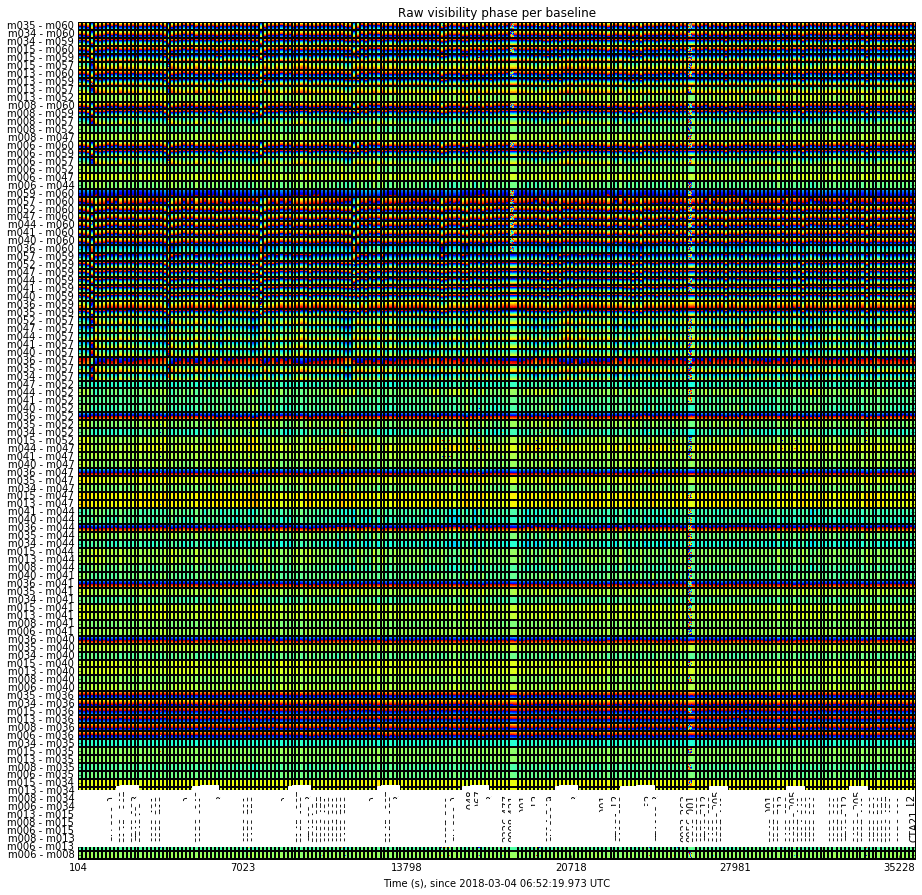

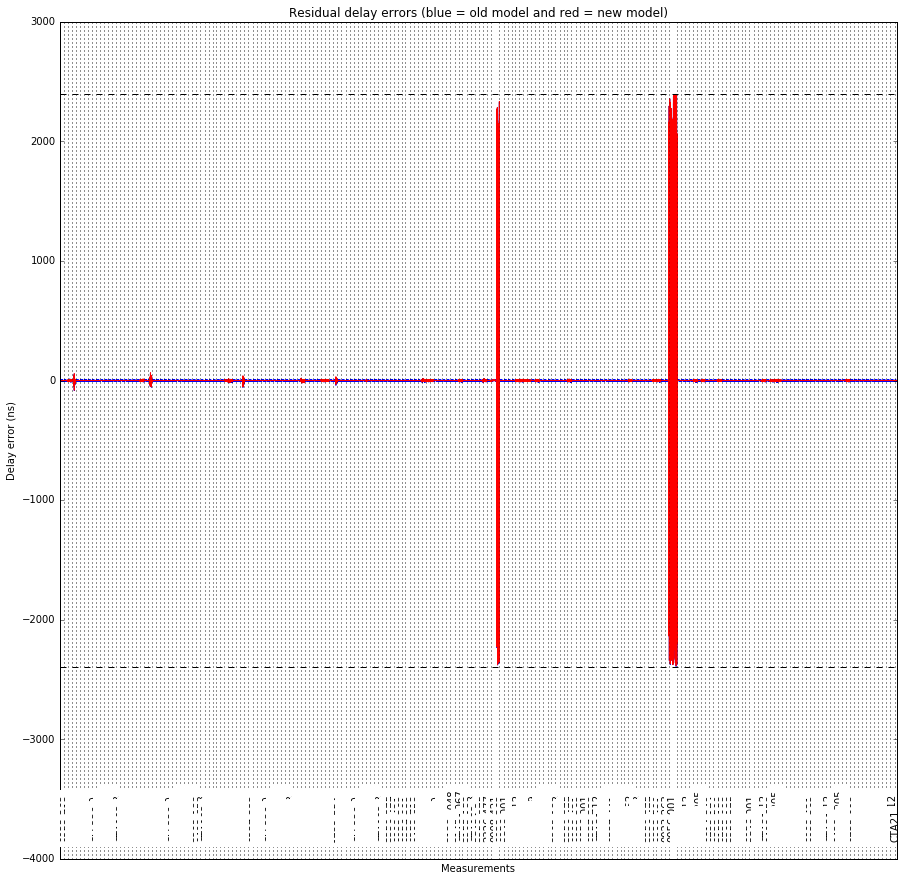

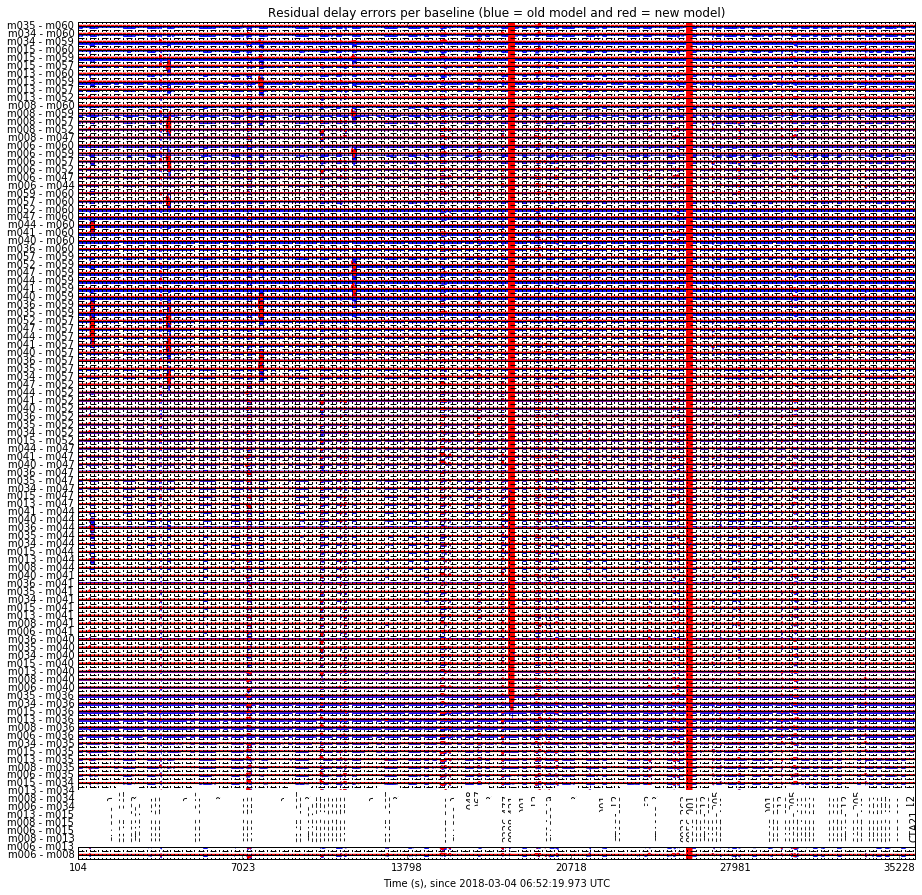

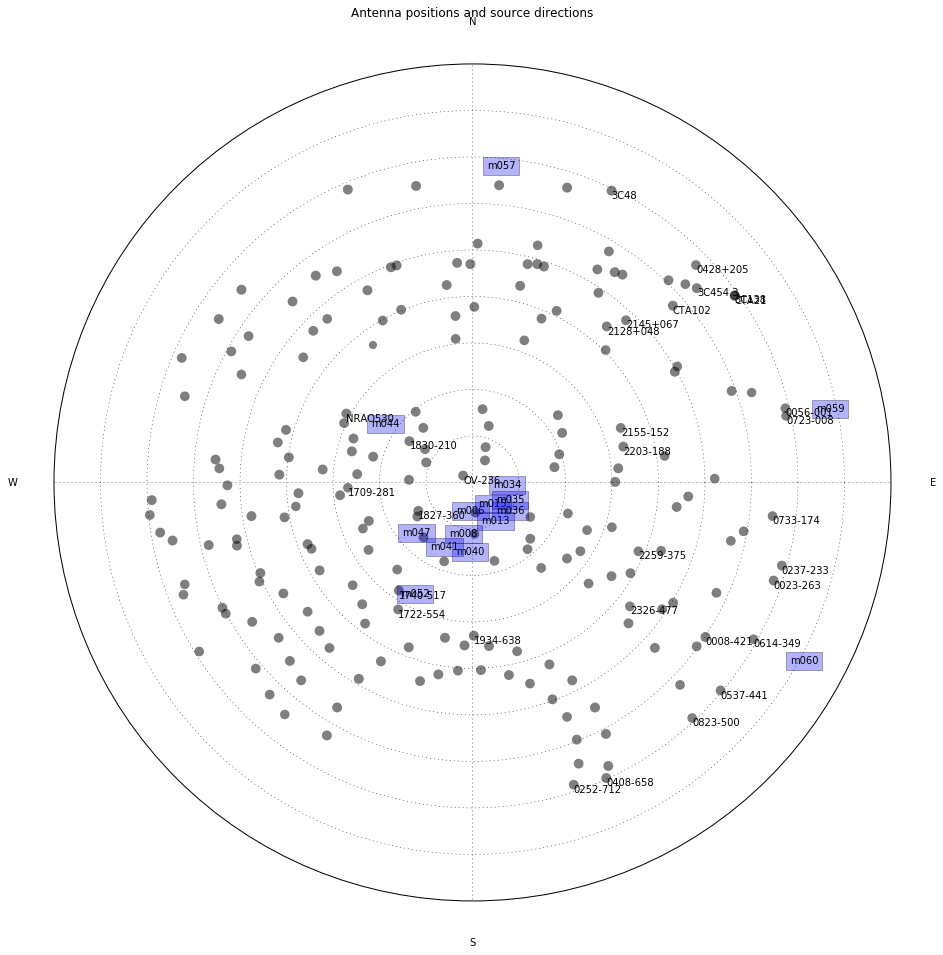

In [9]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
 -a $ants $h5_filename



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1520142927.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (15): m006 (*ref*), m008, m013, m015, m034, m035, m036, m040, m041, m044, m047, m052, m057, m059, m060 [pol V]
baselines (105): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 0-9 0-10 0-11 0-12 0-13 0-1

scan  25 (  15 samples) 0.052 0.054 0.056 0.051 0.053 0.056 0.055 0.056 0.055 0.053 0.055 0.056 0.056 0.053 0.057 0.051 0.054 0.055 0.052 0.056 0.055 0.051 0.052 0.053 0.049 0.053 0.051 0.050 0.052 0.054 0.055 0.051 0.055 0.054 0.054 0.050 0.055 0.055 0.053 0.056 0.056 0.055 0.051 0.054 0.058 0.054 0.058 0.056 0.057 0.052 0.055 0.057 0.050 0.054 0.053 0.052 0.049 0.052 0.052 0.055 0.054 0.053 0.052 0.050 0.052 0.052 0.054 0.050 0.054 0.053 0.050 0.052 0.054 0.053 0.051 0.052 0.054 0.051 0.054 0.055 0.055 0.052 0.052 0.053 0.053 0.054 0.050 0.051 0.051 0.053 0.056 0.053 0.053 0.053 0.056 0.052 0.054 0.054 0.055 0.051 0.051 0.052 0.053 0.055 0.055 '2145+067'
scan  26 (   4 samples) skipped 'slew'
scan  27 (  15 samples) 0.042 0.041 0.044 0.040 0.041 0.043 0.042 0.044 0.044 0.042 0.040 0.042 0.043 0.042 0.045 0.043 0.043 0.043 0.041 0.043 0.042 0.039 0.040 0.042 0.038 0.042 0.041 0.040 0.041 0.042 0.043 0.041 0.044 0.043 0.042 0.039 0.044 0.045 0.042 0.045 0.043 0.044 0.043 0.043 0.045 0.

scan  49 (  15 samples) 0.026 0.028 0.029 0.032 0.027 0.026 0.027 0.028 0.028 0.028 0.027 0.027 0.028 0.033 0.027 0.028 0.027 0.029 0.026 0.027 0.027 0.025 0.026 0.026 0.025 0.026 0.026 0.026 0.026 0.027 0.027 0.026 0.028 0.027 0.028 0.026 0.027 0.028 0.027 0.028 0.028 0.028 0.026 0.027 0.029 0.028 0.029 0.028 0.029 0.026 0.027 0.028 0.027 0.029 0.028 0.028 0.025 0.026 0.027 0.027 0.028 0.028 0.028 0.027 0.028 0.029 0.029 0.027 0.028 0.028 0.026 0.027 0.027 0.028 0.026 0.028 0.030 0.029 0.029 0.030 0.030 0.028 0.028 0.028 0.027 0.027 0.026 0.027 0.027 0.029 0.028 0.026 0.028 0.028 0.030 0.027 0.029 0.028 0.030 0.027 0.028 0.029 0.029 0.031 0.030 'NRAO530'
scan  50 (   6 samples) skipped 'slew'
scan  51 (  15 samples) 0.028 0.028 0.031 0.030 0.027 0.028 0.028 0.028 0.029 0.029 0.028 0.028 0.030 0.031 0.028 0.028 0.028 0.030 0.027 0.029 0.028 0.026 0.026 0.026 0.026 0.026 0.027 0.027 0.026 0.029 0.028 0.026 0.028 0.027 0.028 0.027 0.028 0.029 0.027 0.029 0.028 0.028 0.027 0.028 0.029 0.0

scan  73 (  15 samples) 0.026 0.028 0.028 0.025 0.026 0.027 0.027 0.028 0.028 0.027 0.026 0.027 0.027 0.026 0.029 0.026 0.027 0.027 0.026 0.027 0.027 0.025 0.025 0.025 0.024 0.026 0.025 0.025 0.026 0.027 0.027 0.026 0.027 0.026 0.027 0.025 0.028 0.028 0.026 0.028 0.027 0.027 0.026 0.027 0.028 0.026 0.028 0.027 0.027 0.026 0.027 0.028 0.025 0.027 0.026 0.026 0.024 0.026 0.026 0.027 0.027 0.026 0.026 0.024 0.026 0.026 0.026 0.025 0.026 0.026 0.025 0.026 0.026 0.027 0.026 0.026 0.027 0.026 0.027 0.027 0.028 0.026 0.026 0.026 0.026 0.027 0.025 0.025 0.025 0.026 0.027 0.026 0.026 0.026 0.027 0.026 0.027 0.027 0.027 0.025 0.025 0.026 0.027 0.028 0.027 'CTA102'
scan  74 (   3 samples) skipped 'slew'
scan  75 (  15 samples) 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.013 0.013 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.011 0.011 0.012 0.012 0.011 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.01

scan  97 (  16 samples) 0.032 0.033 0.034 0.030 0.031 0.032 0.033 0.034 0.034 0.032 0.032 0.033 0.033 0.032 0.034 0.032 0.033 0.033 0.032 0.034 0.033 0.030 0.032 0.032 0.030 0.032 0.031 0.031 0.032 0.033 0.032 0.031 0.033 0.032 0.032 0.030 0.033 0.034 0.032 0.033 0.033 0.033 0.031 0.033 0.034 0.033 0.035 0.033 0.033 0.031 0.033 0.034 0.030 0.032 0.032 0.032 0.029 0.031 0.031 0.032 0.033 0.032 0.032 0.030 0.032 0.032 0.033 0.031 0.032 0.032 0.030 0.031 0.032 0.033 0.030 0.032 0.032 0.031 0.032 0.033 0.033 0.031 0.032 0.032 0.032 0.033 0.030 0.031 0.031 0.032 0.034 0.031 0.032 0.032 0.033 0.032 0.033 0.032 0.033 0.031 0.030 0.031 0.032 0.033 0.033 '0237-233'
scan  98 (   9 samples) skipped 'slew'
scan  99 (  15 samples) 0.029 0.027 0.030 0.030 0.027 0.028 0.029 0.029 0.029 0.029 0.028 0.029 0.030 0.032 0.031 0.028 0.029 0.031 0.027 0.029 0.028 0.027 0.027 0.029 0.025 0.027 0.026 0.027 0.027 0.032 0.029 0.027 0.029 0.028 0.028 0.027 0.028 0.029 0.028 0.029 0.029 0.028 0.028 0.027 0.029 0.

scan 121 (  15 samples) 0.081 0.104 0.096 0.096 0.097 0.086 0.100 0.115 0.096 0.088 0.092 0.100 0.089 0.093 0.089 0.106 0.099 0.089 0.102 0.082 0.078 0.073 0.075 0.092 0.087 0.093 0.109 0.104 0.094 0.090 0.101 0.096 0.111 0.101 0.101 0.099 0.101 0.101 0.094 0.105 0.096 0.095 0.093 0.099 0.104 0.104 0.110 0.110 0.101 0.111 0.103 0.102 0.129 0.137 0.096 0.113 0.092 0.097 0.094 0.098 0.082 0.073 0.073 0.068 0.071 0.091 0.096 0.063 0.065 0.065 0.061 0.063 0.065 0.065 0.061 0.074 0.069 0.070 0.071 0.066 0.068 0.079 0.065 0.098 0.104 0.098 0.108 0.084 0.061 0.068 0.115 0.116 0.085 0.064 0.071 0.104 0.070 0.065 0.071 0.075 0.062 0.069 0.066 0.068 0.067 '2259-375'
scan 122 (   3 samples) skipped 'slew'
scan 123 (  16 samples) 0.056 0.060 0.059 0.055 0.057 0.056 0.057 0.060 0.060 0.059 0.058 0.059 0.058 0.058 0.058 0.055 0.058 0.059 0.053 0.059 0.062 0.053 0.054 0.056 0.052 0.056 0.056 0.054 0.056 0.057 0.059 0.056 0.059 0.058 0.057 0.053 0.059 0.059 0.056 0.060 0.060 0.059 0.057 0.057 0.061 0.

scan 145 (  16 samples) 0.026 0.027 0.027 0.025 0.026 0.026 0.027 0.027 0.027 0.027 0.026 0.027 0.027 0.026 0.027 0.026 0.027 0.027 0.026 0.027 0.027 0.024 0.025 0.025 0.025 0.026 0.025 0.025 0.026 0.026 0.026 0.026 0.027 0.026 0.026 0.025 0.027 0.028 0.026 0.027 0.027 0.027 0.026 0.027 0.028 0.027 0.027 0.027 0.027 0.026 0.027 0.028 0.025 0.026 0.026 0.026 0.025 0.025 0.026 0.026 0.026 0.026 0.026 0.024 0.025 0.026 0.026 0.025 0.026 0.026 0.025 0.026 0.027 0.027 0.025 0.025 0.027 0.025 0.026 0.027 0.027 0.026 0.026 0.026 0.026 0.027 0.025 0.025 0.026 0.026 0.027 0.026 0.026 0.026 0.027 0.027 0.026 0.027 0.027 0.025 0.025 0.026 0.026 0.028 0.027 '1827-360'
scan 146 (   3 samples) skipped 'slew'
scan 147 (  15 samples) 0.021 0.022 0.023 0.021 0.021 0.023 0.022 0.024 0.022 0.022 0.022 0.023 0.021 0.023 0.023 0.022 0.023 0.020 0.022 0.022 0.021 0.021 0.022 0.020 0.021 0.020 0.021 0.020 0.022 0.024 0.022 0.022 0.021 0.022 0.022 0.021 0.022 0.023 0.022 0.023 0.022 0.023 0.021 0.022 0.023 0.

scan 169 (  15 samples) 0.039 0.038 0.041 0.037 0.039 0.039 0.039 0.040 0.041 0.037 0.039 0.039 0.041 0.038 0.040 0.037 0.039 0.038 0.038 0.040 0.039 0.036 0.038 0.038 0.036 0.038 0.037 0.036 0.037 0.039 0.039 0.037 0.039 0.038 0.038 0.037 0.040 0.040 0.038 0.041 0.040 0.039 0.038 0.040 0.041 0.039 0.041 0.041 0.040 0.038 0.040 0.041 0.037 0.039 0.038 0.037 0.036 0.037 0.039 0.038 0.038 0.038 0.038 0.036 0.037 0.039 0.039 0.036 0.038 0.038 0.036 0.038 0.039 0.039 0.037 0.037 0.038 0.036 0.039 0.040 0.040 0.037 0.038 0.038 0.039 0.039 0.037 0.036 0.037 0.038 0.040 0.038 0.038 0.039 0.039 0.038 0.039 0.039 0.040 0.036 0.037 0.038 0.039 0.040 0.039 '0008-421'
scan 170 (   6 samples) skipped 'slew'
scan 171 (  15 samples) 0.021 0.021 0.021 0.019 0.019 0.020 0.021 0.022 0.022 0.022 0.021 0.021 0.021 0.021 0.021 0.020 0.021 0.021 0.020 0.022 0.021 0.019 0.020 0.020 0.019 0.019 0.019 0.020 0.021 0.021 0.021 0.020 0.021 0.021 0.021 0.019 0.022 0.022 0.021 0.022 0.022 0.021 0.020 0.021 0.022 0.

scan 193 (  16 samples) 0.046 0.047 0.048 0.045 0.046 0.046 0.047 0.048 0.048 0.046 0.045 0.047 0.048 0.046 0.048 0.046 0.047 0.046 0.044 0.048 0.047 0.044 0.045 0.045 0.043 0.046 0.045 0.045 0.045 0.046 0.047 0.045 0.047 0.047 0.047 0.044 0.049 0.049 0.046 0.048 0.048 0.048 0.045 0.047 0.048 0.047 0.049 0.049 0.048 0.046 0.048 0.048 0.044 0.047 0.046 0.045 0.043 0.045 0.046 0.046 0.049 0.047 0.047 0.045 0.047 0.048 0.049 0.046 0.047 0.047 0.045 0.047 0.048 0.049 0.046 0.045 0.048 0.046 0.048 0.049 0.050 0.047 0.048 0.046 0.047 0.047 0.044 0.046 0.046 0.047 0.048 0.045 0.047 0.048 0.048 0.047 0.047 0.048 0.049 0.045 0.046 0.046 0.047 0.048 0.047 '0537-441'
scan 194 (  12 samples) skipped 'slew'
scan 195 (  16 samples) 0.047 0.048 0.047 0.044 0.046 0.047 0.045 0.048 0.048 0.047 0.046 0.047 0.048 0.047 0.048 0.045 0.049 0.048 0.044 0.047 0.046 0.044 0.043 0.044 0.043 0.045 0.045 0.044 0.045 0.048 0.048 0.046 0.047 0.046 0.047 0.043 0.048 0.047 0.047 0.048 0.047 0.048 0.045 0.047 0.048 0.

scan 219 (  15 samples) 0.071 0.073 0.075 0.068 0.070 0.070 0.071 0.075 0.074 0.069 0.070 0.075 0.071 0.069 0.072 0.070 0.073 0.070 0.071 0.077 0.072 0.070 0.070 0.068 0.065 0.070 0.068 0.068 0.069 0.073 0.073 0.070 0.074 0.072 0.071 0.068 0.076 0.078 0.072 0.076 0.075 0.075 0.072 0.074 0.078 0.074 0.075 0.076 0.074 0.069 0.074 0.076 0.070 0.072 0.072 0.069 0.067 0.066 0.073 0.071 0.073 0.073 0.071 0.067 0.070 0.072 0.074 0.068 0.072 0.070 0.068 0.070 0.073 0.072 0.070 0.069 0.073 0.068 0.072 0.076 0.076 0.070 0.073 0.071 0.073 0.073 0.068 0.069 0.069 0.072 0.073 0.070 0.073 0.073 0.075 0.072 0.072 0.072 0.075 0.070 0.070 0.071 0.074 0.075 0.074 '0056-001'
scan 220 (   6 samples) skipped 'slew'
scan 221 (  15 samples) 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.013 0.013 0.012 0.012 0.013 0.013 0.012 0.013 0.012 0.013 0.013 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.013 0.012 0.013 0.013 0.012 0.013 0.013 0.013 0.012 0.013 0.013 0.

scan 243 (  15 samples) 0.042 0.043 0.044 0.040 0.042 0.042 0.042 0.044 0.044 0.042 0.041 0.043 0.043 0.041 0.043 0.041 0.043 0.044 0.042 0.043 0.042 0.038 0.043 0.041 0.038 0.040 0.041 0.040 0.041 0.043 0.043 0.041 0.042 0.043 0.043 0.038 0.044 0.045 0.042 0.044 0.044 0.044 0.042 0.043 0.044 0.042 0.045 0.044 0.044 0.041 0.043 0.046 0.042 0.042 0.042 0.042 0.039 0.040 0.043 0.042 0.046 0.046 0.045 0.043 0.045 0.045 0.047 0.045 0.043 0.043 0.041 0.043 0.044 0.045 0.042 0.043 0.045 0.042 0.044 0.047 0.046 0.042 0.046 0.044 0.043 0.042 0.041 0.045 0.042 0.044 0.045 0.042 0.047 0.044 0.045 0.043 0.047 0.043 0.045 0.044 0.041 0.044 0.044 0.046 0.046 '2155-152'
scan 244 (   2 samples) skipped 'slew'
scan 245 (  16 samples) 0.029 0.029 0.030 0.027 0.028 0.029 0.029 0.030 0.030 0.029 0.029 0.031 0.030 0.028 0.031 0.029 0.029 0.029 0.028 0.030 0.030 0.027 0.029 0.028 0.027 0.028 0.028 0.027 0.028 0.029 0.030 0.027 0.029 0.030 0.029 0.028 0.030 0.030 0.029 0.030 0.030 0.030 0.028 0.030 0.031 0.

scan 269 (  16 samples) 0.012 0.013 0.013 0.012 0.012 0.014 0.012 0.013 0.013 0.012 0.012 0.013 0.013 0.012 0.013 0.012 0.012 0.013 0.017 0.013 0.014 0.012 0.012 0.012 0.011 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.013 0.013 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.013 0.013 0.013 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 '0408-658'
scan 270 (   8 samples) skipped 'slew'
scan 271 (  16 samples) 0.051 0.052 0.053 0.052 0.052 0.053 0.049 0.051 0.052 0.054 0.052 0.057 0.056 0.052 0.056 0.050 0.053 0.057 0.053 0.053 0.051 0.048 0.049 0.051 0.050 0.050 0.050 0.047 0.049 0.053 0.053 0.048 0.052 0.051 0.051 0.050 0.054 0.054 0.051 0.055 0.054 0.053 0.050 0.053 0.054 0.

scan 293 (  15 samples) 0.086 0.076 0.088 0.080 0.088 0.080 0.087 0.097 0.090 0.089 0.086 0.095 0.086 0.067 0.074 0.082 0.094 0.086 0.071 0.091 0.077 0.078 0.080 0.095 0.090 0.085 0.095 0.095 0.089 0.084 0.093 0.090 0.089 0.095 0.090 0.074 0.073 0.079 0.082 0.092 0.082 0.087 0.076 0.084 0.085 0.089 0.098 0.088 0.086 0.074 0.073 0.092 0.089 0.086 0.085 0.088 0.093 0.091 0.088 0.085 0.062 0.062 0.062 0.059 0.062 0.064 0.063 0.060 0.091 0.090 0.071 0.064 0.090 0.073 0.061 0.082 0.086 0.095 0.101 0.091 0.105 0.100 0.059 0.081 0.078 0.093 0.087 0.060 0.079 0.089 0.078 0.095 0.063 0.081 0.096 0.090 0.063 0.090 0.086 0.059 0.082 0.085 0.088 0.084 0.076 '2326-477'
scan 294 (  18 samples) skipped 'slew'
scan 295 (  16 samples) 0.069 0.050 0.060 0.052 0.078 0.059 0.078 0.071 0.072 0.059 0.063 0.071 0.066 0.049 0.056 0.051 0.079 0.054 0.047 0.069 0.053 0.077 0.061 0.077 0.081 0.077 0.080 0.076 0.078 0.059 0.075 0.078 0.066 0.070 0.065 0.045 0.064 0.077 0.077 0.065 0.081 0.067 0.072 0.073 0.074 0.

scan 317 (  16 samples) 0.042 0.041 0.043 0.039 0.042 0.042 0.042 0.043 0.043 0.041 0.042 0.044 0.043 0.042 0.044 0.041 0.042 0.042 0.040 0.041 0.043 0.038 0.040 0.041 0.038 0.041 0.041 0.039 0.041 0.042 0.042 0.040 0.042 0.042 0.042 0.039 0.044 0.043 0.042 0.043 0.044 0.043 0.042 0.043 0.045 0.042 0.044 0.045 0.043 0.041 0.042 0.044 0.039 0.042 0.042 0.041 0.038 0.040 0.041 0.042 0.043 0.043 0.042 0.040 0.042 0.043 0.044 0.041 0.043 0.041 0.040 0.042 0.043 0.043 0.040 0.042 0.043 0.042 0.043 0.045 0.045 0.041 0.043 0.041 0.042 0.043 0.039 0.041 0.041 0.043 0.043 0.041 0.042 0.043 0.045 0.041 0.043 0.043 0.045 0.040 0.040 0.043 0.042 0.045 0.045 '0537-441'
scan 318 (   2 samples) skipped 'slew'
scan 319 (  16 samples) 0.060 0.063 0.066 0.058 0.059 0.061 0.063 0.064 0.065 0.060 0.062 0.064 0.065 0.060 0.066 0.061 0.063 0.063 0.060 0.061 0.066 0.058 0.060 0.059 0.057 0.059 0.060 0.058 0.060 0.063 0.063 0.060 0.062 0.063 0.061 0.057 0.064 0.065 0.061 0.064 0.065 0.064 0.061 0.062 0.066 0.

scan 343 (  16 samples) 0.029 0.029 0.029 0.028 0.028 0.028 0.028 0.029 0.030 0.028 0.029 0.029 0.030 0.028 0.029 0.028 0.028 0.029 0.028 0.029 0.029 0.027 0.028 0.027 0.026 0.028 0.027 0.027 0.028 0.028 0.029 0.028 0.029 0.029 0.028 0.027 0.030 0.030 0.028 0.029 0.030 0.029 0.028 0.029 0.031 0.029 0.030 0.030 0.030 0.028 0.029 0.030 0.027 0.028 0.029 0.028 0.027 0.028 0.029 0.029 0.028 0.029 0.028 0.026 0.028 0.029 0.029 0.026 0.028 0.028 0.027 0.028 0.028 0.029 0.027 0.027 0.029 0.028 0.028 0.030 0.030 0.027 0.028 0.028 0.029 0.030 0.027 0.027 0.027 0.028 0.031 0.029 0.028 0.028 0.029 0.028 0.029 0.029 0.030 0.027 0.027 0.028 0.028 0.029 0.030 '0237-233'
scan 344 (   9 samples) skipped 'slew'
scan 345 (  15 samples) 0.045 0.050 0.051 0.049 0.048 0.043 0.049 0.048 0.047 0.048 0.048 0.047 0.050 0.048 0.044 0.048 0.049 0.050 0.044 0.052 0.041 0.046 0.044 0.046 0.041 0.048 0.051 0.046 0.044 0.043 0.048 0.044 0.050 0.050 0.048 0.051 0.045 0.047 0.045 0.054 0.046 0.045 0.047 0.046 0.051 0.

scan 367 (  15 samples) 0.061 0.061 0.062 0.061 0.060 0.059 0.059 0.062 0.060 0.061 0.058 0.063 0.062 0.060 0.061 0.062 0.063 0.060 0.058 0.061 0.060 0.056 0.059 0.058 0.056 0.058 0.057 0.058 0.057 0.060 0.063 0.057 0.062 0.061 0.062 0.057 0.063 0.062 0.059 0.063 0.062 0.062 0.060 0.062 0.063 0.062 0.061 0.062 0.063 0.058 0.063 0.064 0.057 0.060 0.060 0.060 0.053 0.057 0.061 0.060 0.062 0.063 0.062 0.058 0.062 0.062 0.064 0.060 0.060 0.061 0.057 0.060 0.061 0.063 0.059 0.058 0.063 0.057 0.060 0.063 0.063 0.059 0.062 0.061 0.062 0.059 0.058 0.061 0.059 0.060 0.063 0.061 0.064 0.062 0.062 0.061 0.064 0.062 0.063 0.060 0.059 0.059 0.061 0.062 0.062 '2326-477'
scan 368 (   3 samples) skipped 'slew'
scan 369 (  15 samples) 0.039 0.039 0.040 0.038 0.038 0.040 0.039 0.040 0.041 0.038 0.038 0.039 0.041 0.039 0.041 0.039 0.039 0.041 0.038 0.040 0.041 0.037 0.038 0.038 0.036 0.038 0.038 0.037 0.038 0.040 0.040 0.039 0.040 0.039 0.039 0.036 0.041 0.040 0.038 0.041 0.040 0.040 0.039 0.039 0.040 0.

scan 391 (  15 samples) 0.033 0.033 0.034 0.032 0.033 0.032 0.033 0.035 0.035 0.032 0.032 0.034 0.032 0.031 0.033 0.033 0.033 0.032 0.031 0.034 0.033 0.031 0.031 0.032 0.031 0.032 0.032 0.032 0.032 0.032 0.033 0.032 0.034 0.033 0.033 0.030 0.035 0.035 0.034 0.035 0.035 0.035 0.032 0.034 0.034 0.033 0.035 0.034 0.034 0.031 0.033 0.036 0.032 0.033 0.033 0.033 0.030 0.032 0.033 0.034 0.033 0.033 0.033 0.031 0.033 0.034 0.033 0.032 0.034 0.034 0.031 0.033 0.033 0.034 0.031 0.032 0.034 0.031 0.034 0.034 0.035 0.032 0.033 0.034 0.034 0.034 0.033 0.032 0.033 0.033 0.034 0.033 0.033 0.034 0.034 0.033 0.033 0.034 0.034 0.031 0.032 0.033 0.034 0.034 0.034 '0723-008'
scan 392 (   3 samples) skipped 'slew'
scan 393 (  16 samples) 0.076 0.077 0.082 0.074 0.077 0.077 0.077 0.080 0.082 0.076 0.078 0.079 0.081 0.078 0.082 0.077 0.079 0.076 0.078 0.076 0.081 0.073 0.077 0.073 0.072 0.074 0.075 0.072 0.076 0.077 0.080 0.077 0.079 0.076 0.078 0.073 0.081 0.080 0.077 0.081 0.080 0.082 0.075 0.077 0.080 0.

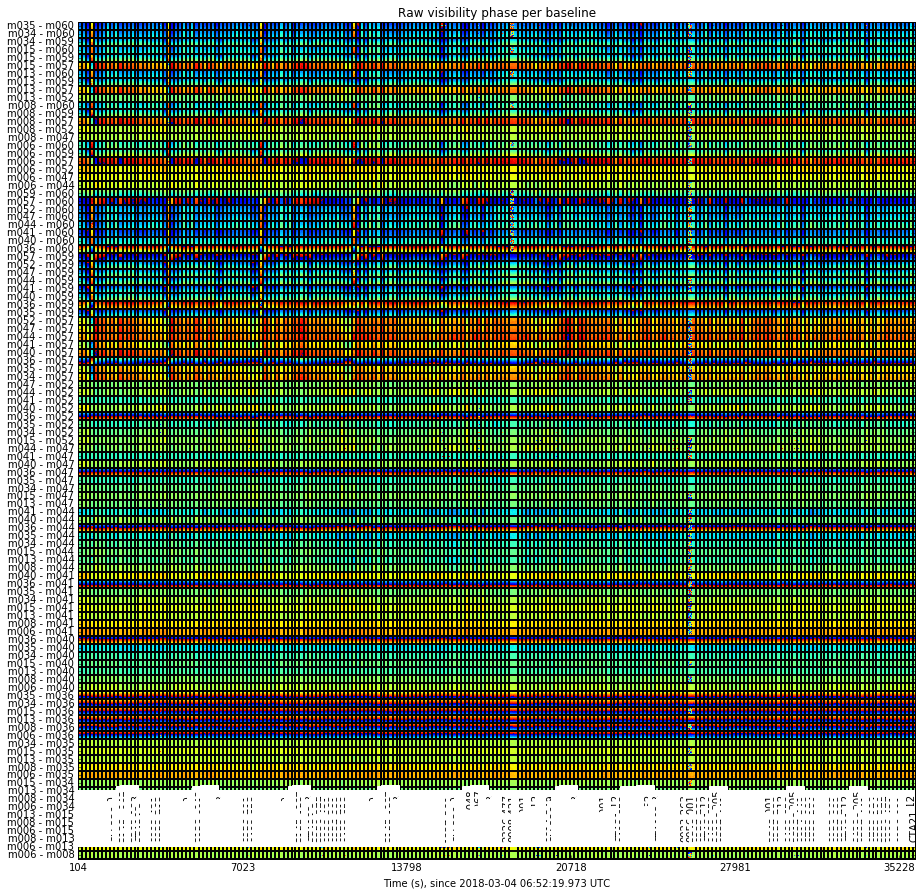

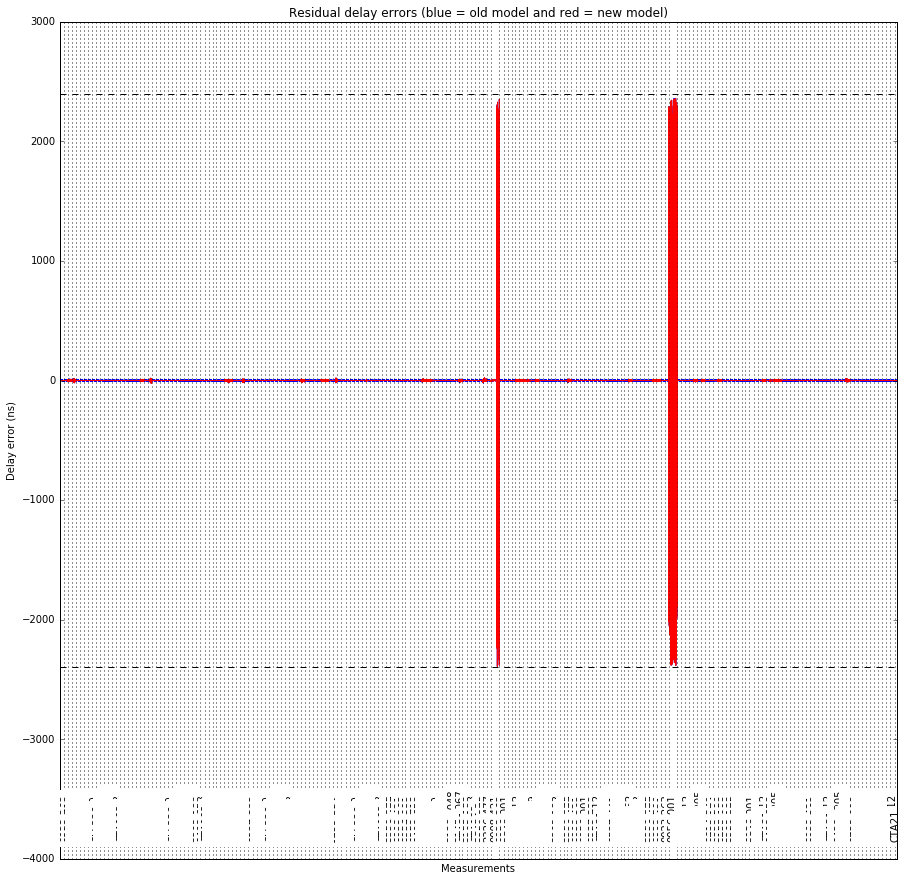

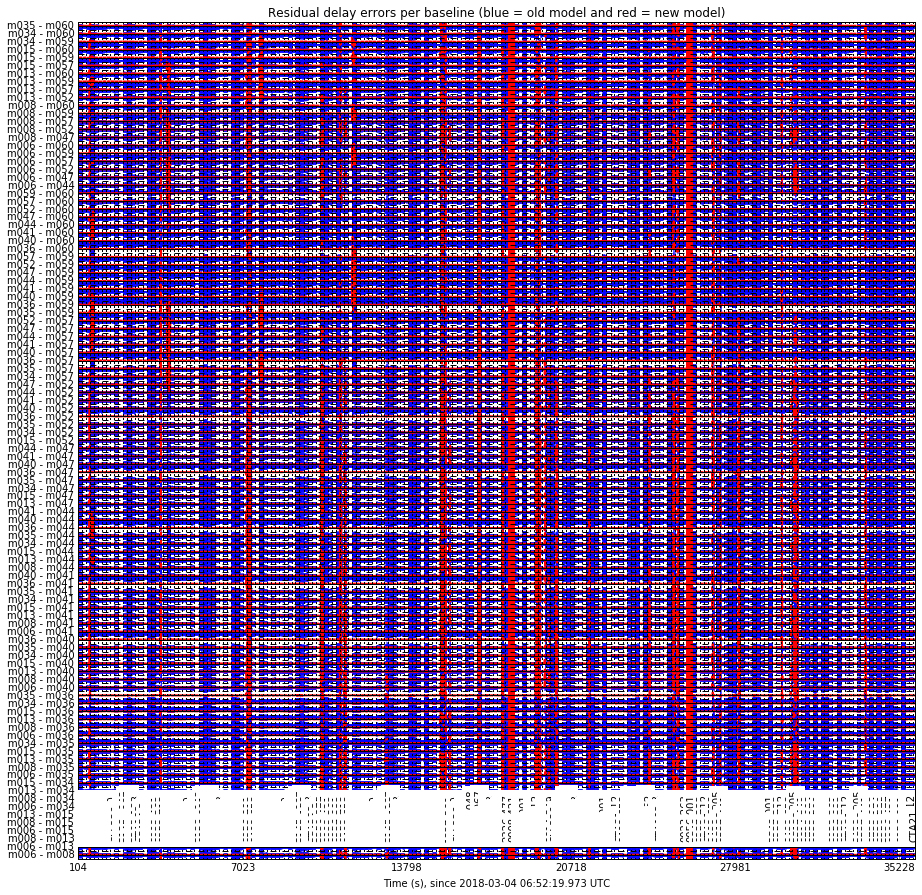

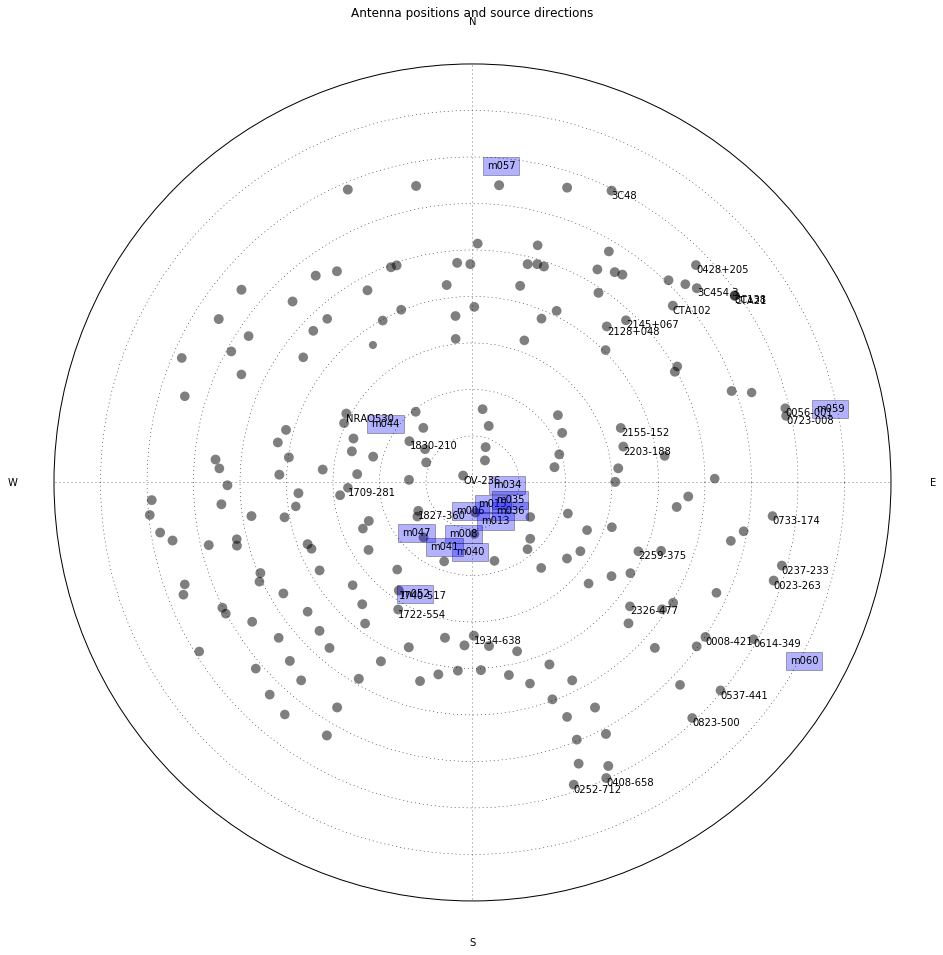

In [10]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
 -a $ants $h5_filename


In [11]:
res_h = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
  -a $ants  $h5_filename
print "Done H"

Done H


In [12]:
res_v = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
  -a $ants $h5_filename
print "Done V"

Done V


In [13]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h

{'m006': {'D': 5880.202, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm008': {'D': 5874.908, 'E': -93.521, 'N': -535.026, 'U': 3.049},
 'm013': {'D': 5863.478, 'E': 236.802, 'N': -393.463, 'U': 3.721},
 'm015': {'D': 5916.984, 'E': 210.656, 'N': -219.143, 'U': 2.343},
 'm034': {'D': 5859.104, 'E': 357.82, 'N': -28.309, 'U': 1.573},
 'm035': {'D': 5855.376, 'E': 386.166, 'N': -180.896, 'U': 2.889},
 'm036': {'D': 5855.686, 'E': 388.269, 'N': -290.762, 'U': 3.411},
 'm040': {'D': 5875.653, 'E': -26.851, 'N': -712.219, 'U': 4.436},
 'm041': {'D': 5888.778, 'E': -287.54, 'N': -661.678, 'U': 2.556},
 'm044': {'D': 5867.43, 'E': -896.15, 'N': 600.504, 'U': -8.034},
 'm047': {'D': 5867.784, 'E': -578.287, 'N': -517.293, 'U': 0.228},
 'm052': {'D': 5862.139, 'E': -593.185, 'N': -1148.65, 'U': 3.164},
 'm057': {'D': 5855.239, 'E': 294.693, 'N': 3259.914, 'U': -18.063},
 'm059': {'D': 5863.443, 'E': 3686.448, 'N': 758.865, 'U': 4.363},
 'm060': {'D': 5875.233, 'E': 3419.684, 'N': -1840.505, 'U': 

In [14]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

{'m006': {'D': 5880.993, 'E': -18.223, 'N': -295.428, 'U': 1.793},
 'm008': {'D': 5875.799, 'E': -93.521, 'N': -535.026, 'U': 3.048},
 'm013': {'D': 5864.225, 'E': 236.802, 'N': -393.463, 'U': 3.719},
 'm015': {'D': 5918.597, 'E': 210.657, 'N': -219.143, 'U': 2.341},
 'm034': {'D': 5860.723, 'E': 357.821, 'N': -28.309, 'U': 1.573},
 'm035': {'D': 5856.245, 'E': 386.165, 'N': -180.897, 'U': 2.887},
 'm036': {'D': 5856.433, 'E': 388.269, 'N': -290.763, 'U': 3.409},
 'm040': {'D': 5876.424, 'E': -26.852, 'N': -712.219, 'U': 4.435},
 'm041': {'D': 5889.533, 'E': -287.541, 'N': -661.677, 'U': 2.557},
 'm044': {'D': 5868.189, 'E': -896.15, 'N': 600.504, 'U': -8.036},
 'm047': {'D': 5868.561, 'E': -578.287, 'N': -517.293, 'U': 0.23},
 'm052': {'D': 5862.887, 'E': -593.186, 'N': -1148.65, 'U': 3.163},
 'm057': {'D': 5856.731, 'E': 294.693, 'N': 3259.913, 'U': -18.063},
 'm059': {'D': 5865.037, 'E': 3686.448, 'N': 758.865, 'U': 4.362},
 'm060': {'D': 5876.1, 'E': 3419.684, 'N': -1840.505, 'U': 

# Cross check between polarizations for derived positions

In [15]:
for a in sorted(delays_v):
    print a,
    print("diff E %06.3f") %(delays_h[a]['E'] - delays_v[a]['E']),
    print("diff N %06.3f") %(delays_h[a]['N'] - delays_v[a]['N']),
    print("diff U %06.3f") %(delays_h[a]['U'] - delays_v[a]['U']),
    print("diff D %06.3f") %(delays_h[a]['D'] - delays_v[a]['D'])
    
# expect differences between E,N and U less than 1cm and Delays less than 3m 

m006 diff E 00.000 diff N 00.000 diff U 00.000 diff D -0.791
m008 diff E 00.000 diff N 00.000 diff U 00.001 diff D -0.891
m013 diff E 00.000 diff N 00.000 diff U 00.002 diff D -0.747
m015 diff E -0.001 diff N 00.000 diff U 00.002 diff D -1.613
m034 diff E -0.001 diff N 00.000 diff U 00.000 diff D -1.619
m035 diff E 00.001 diff N 00.001 diff U 00.002 diff D -0.869
m036 diff E 00.000 diff N 00.001 diff U 00.002 diff D -0.747
m040 diff E 00.001 diff N 00.000 diff U 00.001 diff D -0.771
m041 diff E 00.001 diff N -0.001 diff U -0.001 diff D -0.755
m044 diff E 00.000 diff N 00.000 diff U 00.002 diff D -0.759
m047 diff E 00.000 diff N 00.000 diff U -0.002 diff D -0.777
m052 diff E 00.001 diff N 00.000 diff U 00.001 diff D -0.748
m057 diff E 00.000 diff N 00.001 diff U 00.000 diff D -1.492
m059 diff E 00.000 diff N 00.000 diff U 00.001 diff D -1.594
m060 diff E 00.000 diff N 00.000 diff U 00.001 diff D -0.867


In [16]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [17]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [18]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [19]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')
df


Delay Solutions and antenna locations



,Ants,Delay,East,North,UP,TOC,,delta UP,delta TOC
0,m006,5880.202,-18.223,-295.428,1.793,1052.590,,0.0000,0.000
1,m008,5874.908,-93.521,-535.026,3.0485,1053.990,,1.2555,1.400
2,m013,5863.478,236.802,-393.463,3.72,1054.658,,0.6715,0.668
3,m015,5916.984,210.6565,-219.143,2.342,1053.204,,-1.3780,-1.454
4,m034,5859.104,357.8205,-28.309,1.573,1052.315,,-0.7690,-0.889
5,m035,5855.376,386.1655,-180.8965,2.888,1053.656,,1.3150,1.341
6,m036,5855.686,388.269,-290.7625,3.41,1054.385,,0.5220,0.729
7,m040,5875.653,-26.8515,-712.219,4.4355,1055.301,,1.0255,0.916
8,m041,5888.778,-287.5405,-661.6775,2.5565,1053.502,,-1.8790,-1.799
9,m044,5867.43,-896.15,600.504,-8.035,1043.012,,-10.5915,-10.490


In [20]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)


32512